# Evidencia de Arquitectura Base

Este cuaderno documenta y verifica la **Arquitectura Base** del proyecto `business_backend`, construida sobre cuatro pilares tecnológicos:

1.  **FastAPI**: Framework web de alto rendimiento.
2.  **GraphQL (Strawberry)**: Capa de API flexible y tipada.
3.  **PostgreSQL (SQLAlchemy Async)**: Persistencia de datos robusta.
4.  **LangChain**: Integración de Inteligencia Artificial y Agentes.


## 1. Diagrama de Arquitectura

El siguiente diagrama muestra cómo interactúan estos componentes en el sistema.

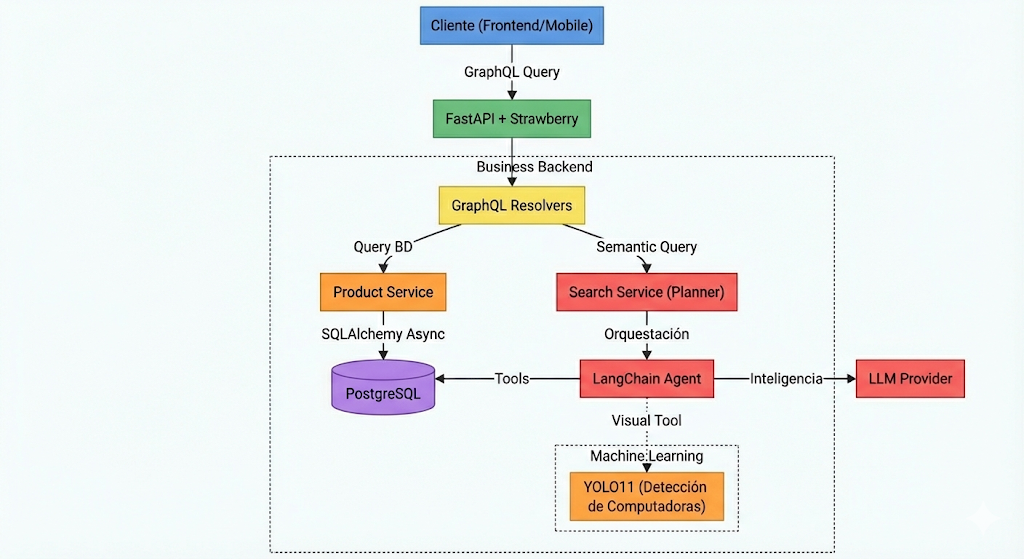

## 2. Verificación de Componentes

Analizamos el código fuente para confirmar la implementación de cada pilar.

In [ ]:
import inspect
import sys
import os

# Setup paths
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

# Importar componentes clave
from fastapi import FastAPI
import strawberry
from sqlalchemy.ext.asyncio import AsyncEngine
from langchain_core.tools import BaseTool

print("✅ Librerías Base Instaladas:")
print(f"  - FastAPI: {FastAPI.__module__}")
print(f"  - Strawberry (GraphQL): {strawberry.__version__}")
print(f"  - SQLAlchemy (Async): {AsyncEngine.__module__}")
print(f"  - LangChain Core: {BaseTool.__module__}")

### 2.1 FastAPI & GraphQL (Entry Point)
Verificamos `main.py` donde se define la app FastAPI y el router GraphQL.

In [ ]:
from business_backend.main import create_business_backend_app

app = create_business_backend_app()

print(f"\n✅ Aplicación Creada: {app.title}")
print("  Rutas Registradas:")
for route in app.routes:
    print(f"  - {route.path} [{route.name}]")

### 2.2 PostgreSQL (Database Layer)
Verificamos la conexión asíncrona y los modelos.

In [ ]:
from business_backend.database.connection import create_async_engine
from business_backend.database.models import ProductStock

print("✅ Capa de Datos:")
print(f"  - Modelo Principal: {ProductStock.__name__}")
print(f"  - Tabla SQL: {ProductStock.__tablename__}")
print(f"  - Esquema: {ProductStock.__table_args__.get('schema', 'public')}")

### 2.3 LangChain (Agentes)
Verificamos la integración del Planner y sus Herramientas.

In [ ]:
from business_backend.services.search_service import SearchService
from business_backend.llm.tools.product_search_tool import ProductSearchTool

print("✅ Capa de Inteligencia:")
print(f"  - Servicio Orquestador: {SearchService.__name__}")
print(f"  - Tool: {ProductSearchTool.__name__}")
print(f"    - Descripción: {ProductSearchTool.description[:50]}...")

## Conclusión

La arquitectura base está correctamente establecida y desacoplada:

1.  **FastAPI** maneja el servidor HTTP.
2.  **GraphQL** expone los datos de manera eficiente.
3.  **SQLAlchemy Async** permite alta concurrencia en BD.
4.  **LangChain** dota de capacidades cognitivas al sistema.

Esta base es sólida para escalar nuevas funcionalidades (como el módulo ML de reconocimiento visual ya integrado).